# Social Media Visualizations

## STEP 1: Read Input Data Files

In [ ]:
import pandas as pd
import numpy as np
import altair as alt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data files (CHANGE DIRECTORY HERE)
facebook_df = pd.read_csv("/content/drive/MyDrive/Data Vis 1 64/Task8 Project Submission/aggr_fb_df_v2.csv")
youtube_df = pd.read_csv("/content/drive/MyDrive/Data Vis 1 64/Task8 Project Submission/yt_v4_after_midterm.csv")
twitter_df = pd.read_csv("/content/drive/MyDrive/Data Vis 1 64/Task8 Project Submission/twitter_v2.csv")
instagram_df = pd.read_csv("/content/drive/MyDrive/Data Vis 1 64/Task8 Project Submission/aggr_ig_df_v2.csv")

# Replace inf by nan
facebook_df.replace([np.inf, -np.inf], np.nan, inplace=True)
youtube_df.replace([np.inf, -np.inf], np.nan, inplace=True)
twitter_df.replace([np.inf, -np.inf], np.nan, inplace=True)
instagram_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Platform and color encoding
dataset = {"Facebook": facebook_df, "Youtube": youtube_df, "Twitter": twitter_df, "Instagram": instagram_df}
color_picker = {"Facebook": "#3258a8", "Youtube": "#f23c0a", "Twitter": "#11ddf7", "Instagram": "#983bf5",
                      "less than mean": "#8bfa1b", "greater than mean": "#097a2b", "percent less than zero": "#6205ad",
                      "percent less than mean": "#8bfa1b", "percent greater than mean": "#097a2b"}

## STEP 2: Summarize Data

In [ ]:
total_post_dictionary = {}
num_rows = 0
for platform in list(dataset.keys()):
  mean_total_post = dataset[platform]["total_num_post"].mean() / 365
  total_post_dictionary[num_rows] = [platform, mean_total_post, color_picker[platform]]
  num_rows += 1

total_posts = pd.DataFrame.from_dict(total_post_dictionary, orient = "index", columns = ["platform", "value", "color"])

In [ ]:
total_posts

,platform,value,color
0,Facebook,4.471802,#3258a8
1,Youtube,0.328063,#f23c0a
2,Twitter,1.376903,#11ddf7
3,Instagram,0.838107,#983bf5


In [ ]:
post_activities_dictionary = {}
num_rows = 0

for platform in list(dataset.keys()):
  for quarter in range(1, 5):
    mean_post_per_user = (dataset[platform]["q"+str(quarter)] * dataset[platform]["total_num_post"] / (100*90)).mean()
    post_activities_dictionary[num_rows] = [platform, "Q" + str(quarter) + ":2020", mean_post_per_user, color_picker[platform]]
    num_rows += 1


post_activities = pd.DataFrame.from_dict(post_activities_dictionary, orient = "index", columns = ["platform", "quarter", "value", "color"])

In [ ]:
post_activities

,platform,quarter,value,color
0,Facebook,Q1:2020,4.221311,#3258a8
1,Facebook,Q2:2020,4.175229,#3258a8
2,Facebook,Q3:2020,4.738825,#3258a8
3,Facebook,Q4:2020,5.000277,#3258a8
4,Youtube,Q1:2020,0.303406,#f23c0a
5,Youtube,Q2:2020,0.347645,#f23c0a
6,Youtube,Q3:2020,0.340575,#f23c0a
7,Youtube,Q4:2020,0.338851,#f23c0a
8,Twitter,Q1:2020,1.536971,#11ddf7
9,Twitter,Q2:2020,1.438029,#11ddf7


In [ ]:
col_dict = {"Facebook": [["likes_per_post",	"loves_per_post",	"wows_per_post",	"hahas_per_post",	"angrys_per_post",	"sads_per_post"],	["comments_per_post"],	["shares_per_post"]],
                "Youtube": [["likes_per_post",	"dislikes_per_post"],	["comments_per_post"],	["shares_per_post"]],
                "Twitter": [["favorite_ratio_per_post"],	["reply_per_post"],	["retweet_per_post"]],
                "Instagram": [["likes_per_post"],	["comments_per_post"],	["shares_per_post"]]}
total_engagement_dictionary = {}
num_rows = 0
aggs = {0: "reactions_per_post", 1: "comments_per_post", 2: "shares_per_post"}
for platform in list(dataset.keys()):
  for i in range(3):
    mean  = np.mean(dataset[platform][col_dict[platform][i]], axis = 0)
    order = i
    total_engagement_dictionary[num_rows] = [platform, aggs[i], sum(mean), color_picker[platform], order]
    num_rows += 1

total_engagements = pd.DataFrame.from_dict(total_engagement_dictionary, orient = "index", columns = ["platform", "attribute", "value", "color", "order"])

In [ ]:
total_engagements

,platform,attribute,value,color,order
0,Facebook,reactions_per_post,20286.902706,#3258a8,0
1,Facebook,comments_per_post,1108.243807,#3258a8,1
2,Facebook,shares_per_post,3259.428234,#3258a8,2
3,Youtube,reactions_per_post,3215.809708,#f23c0a,0
4,Youtube,comments_per_post,166.607986,#f23c0a,1
5,Youtube,shares_per_post,128.442042,#f23c0a,2
6,Twitter,reactions_per_post,0.665783,#11ddf7,0
7,Twitter,comments_per_post,4.075273,#11ddf7,1
8,Twitter,shares_per_post,413.800398,#11ddf7,2
9,Instagram,reactions_per_post,3632.264969,#983bf5,0


In [ ]:
engagement_dictionary = {}
num_rows = 0
for platform in list(dataset.keys()):
  # Deal with inf issue
  engagemean = dataset[platform]["engagement_ratio_per_post"].dropna().mean()
  print(dataset[platform]["engagement_ratio_per_post"].describe())
  greatermean = sum(dataset[platform]["engagement_ratio_per_post"].dropna() >= engagemean)
  label = "greater than " + "{:.2f}".format(engagemean)
  engagement_dictionary[num_rows] = [platform, "greater than mean", greatermean, color_picker[platform], label]
  num_rows += 1
 
  engagemean = dataset[platform]["engagement_ratio_per_post"].dropna().mean()
  lessermean = sum(dataset[platform]["engagement_ratio_per_post"].dropna() < engagemean)
  label = "less than " + "{:.2f}".format(engagemean)
  engagement_dictionary[num_rows] = [platform,  "less than mean", lessermean, color_picker[platform], label]
  num_rows += 1
    
engagement = pd.DataFrame.from_dict(engagement_dictionary, orient = "index", columns = ["platform", "category", "value", "color", "label"])

count    2084.000000
mean        0.011688
std         0.050408
min         0.000000
25%         0.000875
50%         0.003179
75%         0.009061
max         1.594128
Name: engagement_ratio_per_post, dtype: float64
count    1015.000000
mean        0.020896
std         0.067484
min         0.000000
25%         0.002162
50%         0.005393
75%         0.013408
max         1.272727
Name: engagement_ratio_per_post, dtype: float64
count    503.000000
mean       1.834189
std       34.896902
min        0.000000
25%        0.002569
50%        0.011938
75%        0.045322
max      781.427690
Name: engagement_ratio_per_post, dtype: float64
count    1010.000000
mean        0.077392
std         0.616165
min         0.000000
25%         0.011110
50%         0.025703
75%         0.058768
max        13.784173
Name: engagement_ratio_per_post, dtype: float64


In [ ]:
engagement

,platform,category,value,color,label
0,Facebook,greater than mean,414,#3258a8,greater than 0.01
1,Facebook,less than mean,1670,#3258a8,less than 0.01
2,Youtube,greater than mean,174,#f23c0a,greater than 0.02
3,Youtube,less than mean,841,#f23c0a,less than 0.02
4,Twitter,greater than mean,13,#11ddf7,greater than 1.83
5,Twitter,less than mean,490,#11ddf7,less than 1.83
6,Instagram,greater than mean,173,#983bf5,greater than 0.08
7,Instagram,less than mean,837,#983bf5,less than 0.08


In [ ]:
percentage_dictionary = {}
num_rows = 0
for platform in list(dataset.keys()):
  percentengagemean = dataset[platform]["percent_change_fan"].dropna().mean()
  percentgreatermean = sum(dataset[platform]["percent_change_fan"].dropna() >= percentengagemean)
  label = "greater than " + "{:.2f}".format(percentengagemean) + "%"
  percentage_dictionary[num_rows] = [platform, "percent greater than mean",percentgreatermean, color_picker[platform], label]
  num_rows += 1
    
  percentengagemean = dataset[platform]["percent_change_fan"].dropna().mean()
  # Filter twice: less than mean and greater than or equal to 0
  filtered_df = dataset[platform][(dataset[platform]["percent_change_fan"].isna() == False) & (dataset[platform]["percent_change_fan"] < percentengagemean) & (dataset[platform]["percent_change_fan"] >= 0)]
  percentlessermean = len(filtered_df.index)
  label = "less than " + "{:.2f}".format(percentengagemean) + "%" + " and non-negative"
  percentage_dictionary[num_rows] = [platform,"percent less than mean", percentlessermean, color_picker[platform], label]
  num_rows += 1  
    
  percentlesserzero = sum(dataset[platform]["percent_change_fan"].dropna() < 0)
  label = "less than 0%"
  percentage_dictionary[num_rows] = [platform, "percent less than zero",percentlesserzero, color_picker[platform], label]
  num_rows += 1
 
percentage = pd.DataFrame.from_dict(percentage_dictionary, orient = "index", columns = ["platform", "category", "value", "color", "label"])

In [ ]:
percentage

,platform,category,value,color,label
0,Facebook,percent greater than mean,446,#3258a8,greater than 15.97%
1,Facebook,percent less than mean,1313,#3258a8,less than 15.97% and non-negative
2,Facebook,percent less than zero,325,#3258a8,less than 0%
3,Youtube,percent greater than mean,192,#f23c0a,greater than 37.07%
4,Youtube,percent less than mean,806,#f23c0a,less than 37.07% and non-negative
5,Youtube,percent less than zero,20,#f23c0a,less than 0%
6,Twitter,percent greater than mean,10,#11ddf7,greater than 3958.01%
7,Twitter,percent less than mean,431,#11ddf7,less than 3958.01% and non-negative
8,Twitter,percent less than zero,62,#11ddf7,less than 0%
9,Instagram,percent greater than mean,198,#983bf5,greater than 44.54%


## STEP 3: Visualizations Using Altair

In [ ]:
input_dropdown = alt.binding_select(options=list(dataset.keys()))
selector = alt.selection_single(fields=['platform'], bind=input_dropdown, name='Select')
color_scale =  alt.Color("platform:N", scale = alt.Scale(domain = list(color_picker.keys()), range = list(color_picker.values())))

num_posts_bar = alt.Chart(total_posts).mark_bar(size = 50).encode(
    x = alt.X("platform", axis = alt.Axis(title = "", labelAngle = 0)),
    y = alt.Y("value", axis=alt.Axis(title = "Posts : Day")),
    color=alt.condition(selector, color_scale, alt.value("lightgray")),
     tooltip=[alt.Tooltip("platform"), alt.Tooltip("value", title ='posts per day',format='.2f'), ]
).interactive(bind_y = False).properties(
    width = 300,
    height = 200,
    title = "The Number of Posts by a User"
)   

post_activities_line = alt.Chart(post_activities).mark_line().encode(
                  x=alt.X('quarter',axis = alt.Axis(title = '', labelAngle = 0)),
                  y= alt.Y('value', axis=alt.Axis(title='Posts : Day'), scale = alt.Scale(domain = (0, 5.5))),
                  color= alt.condition(selector, color_scale, alt.value("lightgray")),
).properties(
    width = 300,
    height = 200,
    title =  "The Number of Posts by a User Over Time"
)

text = alt.Chart(post_activities).mark_text(dx=0, dy=-5).encode(
    x=alt.X("quarter"),
    y=alt.Y('value'),
    text=alt.condition(selector, alt.Text('value:Q', format='.2f', title = "posts"), alt.value(""))
)

panel1 = alt.hconcat(num_posts_bar, post_activities_line + text)

In [ ]:
color_scale2 =  alt.Color("category:N", scale = alt.Scale(domain = ["less than mean", "greater than mean"], 
                                                          range = ["#8bfa1b", "#097a2b"]))
color_scale3 = alt.Color("category:N", scale = alt.Scale(domain = ["percent less than zero", "percent less than mean", "percent greater than mean"], 
                                                          range = ["#6205ad", "#8bfa1b", "#097a2b"]))

engagement_scatter = alt.Chart(total_engagements).mark_line(point = True, size = 5).encode(
    x = alt.X("attribute", sort = ["reactions_per_post", "comments_per_post", "shares_per_post"], axis = alt.Axis(title = "", labelAngle = 0)),
    y = alt.Y("value", axis = alt.Axis(title = "Engagements : Post")),
    color = alt.condition(selector, color_scale, alt.value("lightgray")),
).properties(
    width = 300,
    height = 250,
    title = "Engagements per Post, by Engagement Categories"
)

text2 = alt.Chart(total_engagements).mark_text(dx=0, dy=-5).encode(
    x=alt.X("attribute", sort = ["reactions_per_post", "comments_per_post", "shares_per_post"], ),
    y=alt.Y('value'),
    text=alt.condition(selector, alt.Text('value:Q', format='.2f'), alt.value(""))
)

panel2 = engagement_scatter + text2

engagement_bar = alt.Chart(engagement).mark_bar(size = 20).encode(
    x = alt.X("sum(value)", axis = alt.Axis(title = "Count: The Number of Users", labelAngle = 0)),
    y = alt.Y("platform", axis = alt.Axis(title = "")),
    color= alt.condition(selector, color_scale2, alt.value("lightgray")),
    order = alt.Order("category", sort = "descending"),
    tooltip=[alt.Tooltip("platform"), alt.Tooltip("label", title ='category'), alt.Tooltip("value", title ='count',format='.0f'), ]
).interactive().properties(
    width = 300,
    height = 100,
    title = "Metrics 1: Engagement Ratio Per Post in 2020"
).add_selection(selector)

percentage_bar = alt.Chart(percentage).mark_bar(size = 20).encode(
    x = alt.X("sum(value)", axis = alt.Axis(title = "Count: The Number of Users", labelAngle = 0)),
    y = alt.Y("platform", axis = alt.Axis(title = "")),
    color= alt.condition(selector, color_scale3, alt.value("lightgray")),
    order = alt.Order("category", sort = "descending"),
    tooltip=[alt.Tooltip("platform"), alt.Tooltip("label", title ='category'), alt.Tooltip("value", title ='count',format='.0f'), ]
).interactive().properties(
    width = 300,
    height = 100,
    title = "Metrics 2: Percent Change of Fan over 2020"
)

panel3 = alt.vconcat(engagement_bar, percentage_bar)

panel2_3 = alt.hconcat(panel2, panel3)

In [ ]:
alt.vconcat(panel1, panel2_3, title=' SOCIAL MEDIA ANALYTICS')

alt.VConcatChart(...)

## Visual Variables Note  
- To represent the activities across platform, we use the unit of "posts : day." In overview, we used the length of bar chart to show how frequent an average user posts in each platform. To show changes in each quarter, we used the location of X and Y axis and connect each point using line charts.  
- Aside from that, we have broken down down "engagement" into three categories namely reactions, comments and shares, which are common across these four platforms. We used the technique of connected scatterplot to show these variables in all platforms at once (color + location).  
- Finally, to illustrate how users perform in these two metrics, we group the users into a few bins to produce stacked bar chart. (Details about each bin) We use the length of the bar to represent the number of users. By aggregating the counts across these bins, the total length would represent the total number of users. 

## Binning Demonstration

Text(0.5, 0, 'Engagement Ratio Per Post')

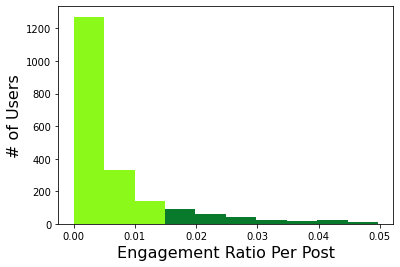

In [ ]:
import matplotlib.pyplot as plt
engagement_ratio_FB = dataset["Facebook"]["engagement_ratio_per_post"]
engagement_ratio_FB_short = engagement_ratio_FB[engagement_ratio_FB < 0.05]
plt.subplot(1, 1, 1)
N, bins, patches = plt.hist(engagement_ratio_FB_short)
for c, p in zip(bins, patches):
    if c  < 0.01:
        plt.setp(p, 'facecolor', "#8bfa1b")
    else:
        plt.setp(p, 'facecolor', "#097a2b")
plt.ylabel("# of Users", fontsize = 16)
plt.xlabel("Engagement Ratio Per Post", fontsize = 16)

Text(0.5, 0, 'Engagement Ratio Per Post')

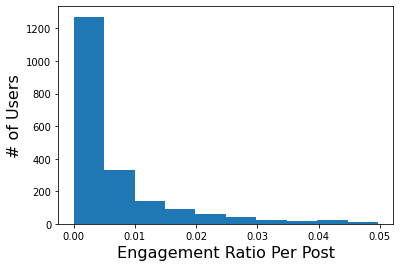

In [ ]:
plt.hist(engagement_ratio_FB_short)
plt.ylabel("# of Users", fontsize = 16)
plt.xlabel("Engagement Ratio Per Post", fontsize = 16)

Text(0.5, 0, '% Change of Fans')

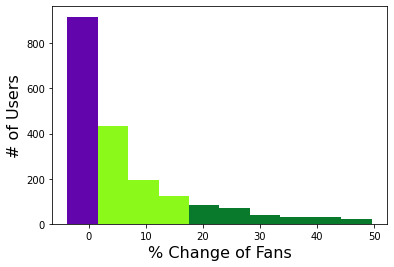

In [ ]:
import matplotlib.pyplot as plt
engagement_ratio_FB = dataset["Facebook"]["percent_change_fan"]
engagement_ratio_FB_short = engagement_ratio_FB[(engagement_ratio_FB > -5) & (engagement_ratio_FB < 50)]
plt.subplot(1, 1, 1)
N, bins, patches = plt.hist(engagement_ratio_FB_short)
for c, p in zip(bins, patches):
    if c  < 0.01:
        plt.setp(p, 'facecolor', "#6205ad")
    elif c < 15.97:
        plt.setp(p, 'facecolor', "#8bfa1b")      
    else:
        plt.setp(p, 'facecolor', "#097a2b")
plt.ylabel("# of Users", fontsize = 16)
plt.xlabel("% Change of Fans", fontsize = 16)

Text(0.5, 0, '% Change of Fans')

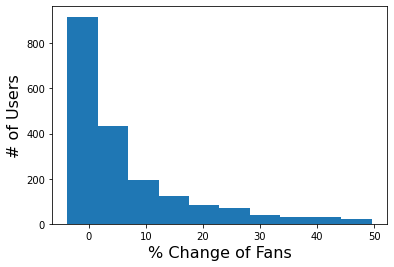

In [ ]:
plt.hist(engagement_ratio_FB_short)
plt.ylabel("# of Users", fontsize = 16)
plt.xlabel("% Change of Fans", fontsize = 16)